In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")
from pydataset import data

import wrangle_zillow as wz

## 1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

In [2]:
iris = data('iris')

In [3]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


#### a. Choose features other than the ones used in the lesson.

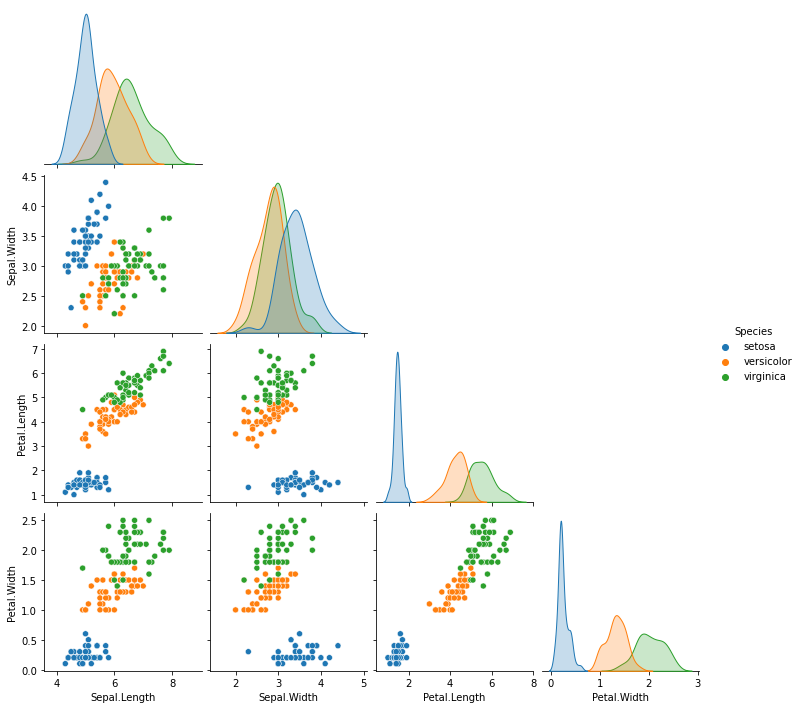

In [4]:
sns.pairplot(iris, corner=True, hue='Species')

In [5]:
X = iris[['Petal.Width', 'Sepal.Width']]

#### b. Visualize the results of your clustering.

In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

iris['cluster'] = kmeans.predict(X)

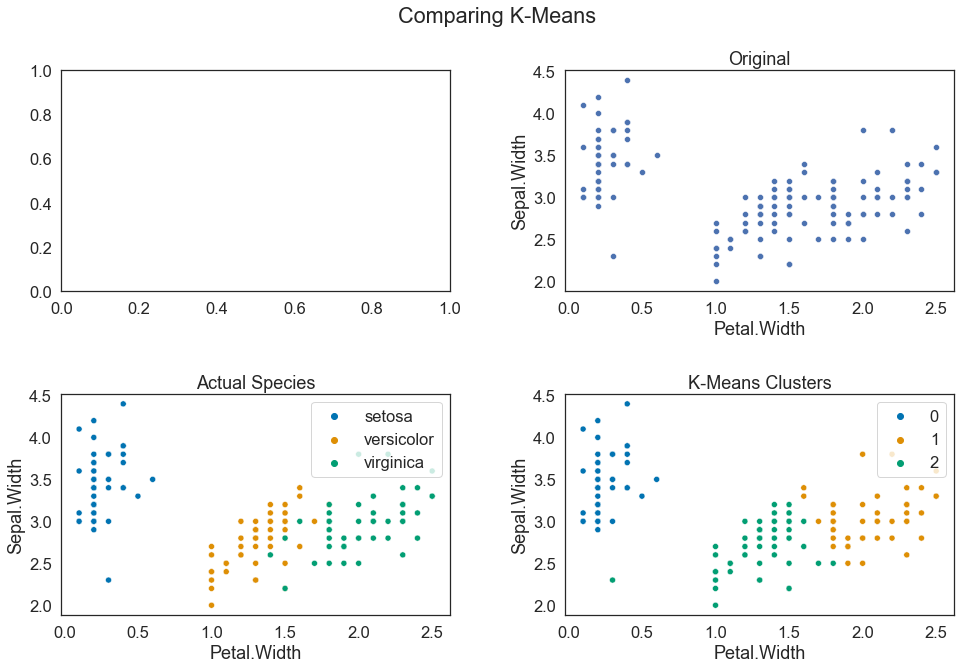

In [7]:
sns.set(font_scale=1.5)
sns.set_style('white')

fig, ax = plt.subplots(2,2, figsize=(15,10))
fig.tight_layout(pad=4.0)

fig.suptitle("Comparing K-Means")

sns.scatterplot(data=iris, x='Petal.Width', y='Sepal.Width', ax=ax[0,1])
ax[0,1].set_title('Original')

sns.scatterplot(data=iris, x='Petal.Width', y='Sepal.Width', hue='Species', ax=ax[1,0], palette='colorblind')
ax[1,0].set_title('Actual Species')
ax[1,0].legend(loc='upper right')

sns.scatterplot(data=iris, x='Petal.Width', y='Sepal.Width', hue='cluster', ax=ax[1,1], palette='colorblind')
ax[1,1].set_title('K-Means Clusters')
ax[1,1].legend(loc='upper right')

plt.show()

#### c. Use the elbow method to visually select a good value for k.

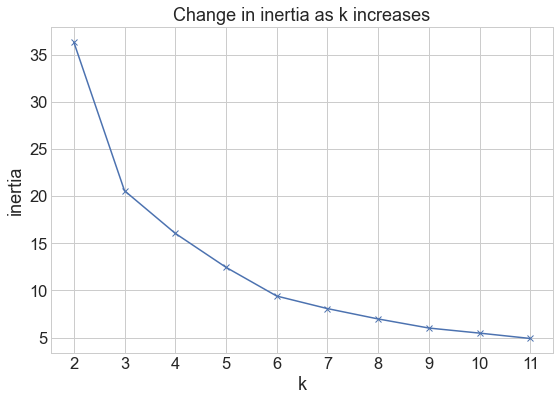

In [8]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

Looks like 4 is still the elbow point.

#### d. Repeat the clustering, this time with 3 different features.

In [9]:
X2 = iris[['Petal.Width', 'Sepal.Width', 'Petal.Length']]

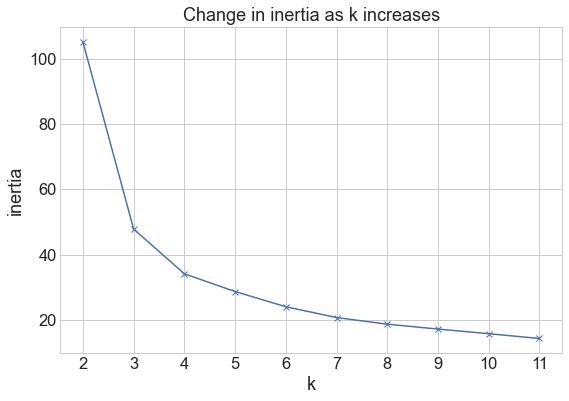

In [10]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X2).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

## 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [11]:
import wrangle_mall as wm

customers = wm.new_mall_data()

train, validate, test = wm.split_data(customers)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 176 to 155
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     129 non-null    int64 
 1   gender          129 non-null    object
 2   age             129 non-null    int64 
 3   annual_income   129 non-null    int64 
 4   spending_score  129 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.0+ KB


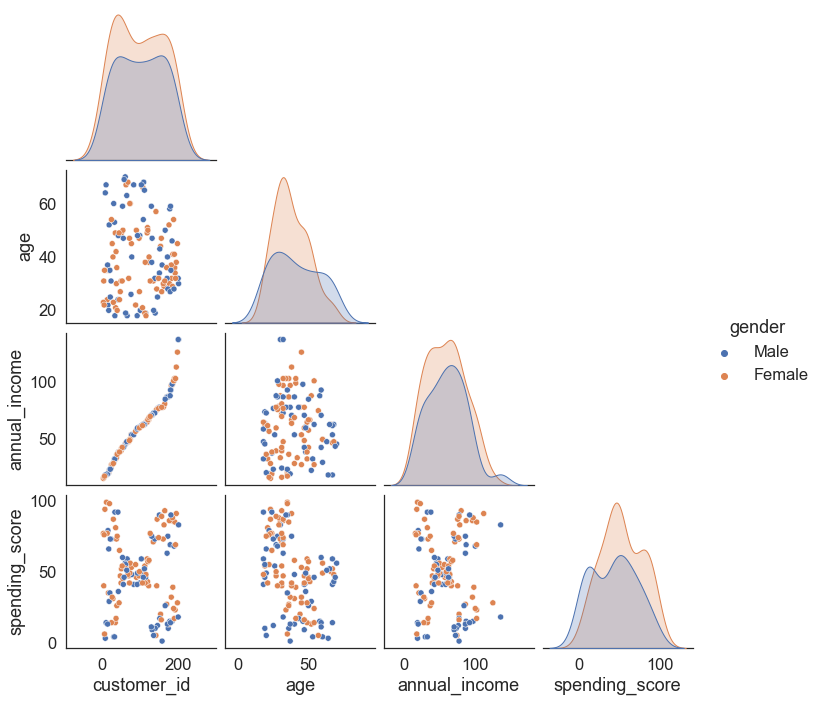

In [13]:
sns.pairplot(train, corner=True, hue='gender')

In [14]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,129.0,99.581395,60.747518,4.0,43.0,100.0,155.0,200.0
age,129.0,39.155039,14.344233,18.0,28.0,36.0,49.0,70.0
annual_income,129.0,60.077519,27.550979,16.0,39.0,61.0,78.0,137.0
spending_score,129.0,48.620155,26.372095,1.0,28.0,48.0,73.0,99.0


In [15]:
train['age_bin'] = pd.cut(train.age, [18, 35, 50, 70])

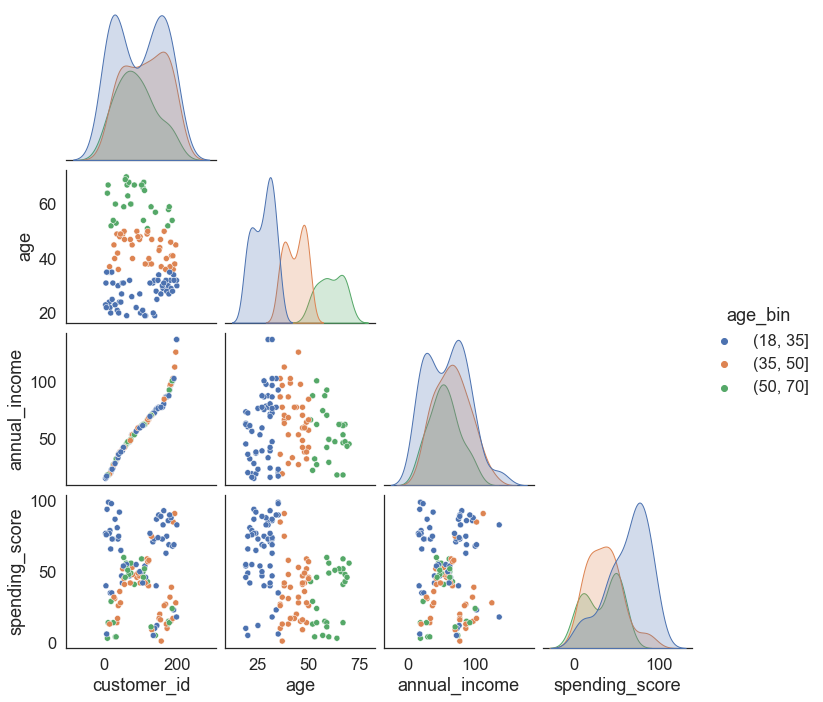

In [16]:
sns.pairplot(train, corner=True, hue='age_bin')

In [17]:
train['income_bin'] = pd.cut(train.annual_income, [16, 55, 96, 137])

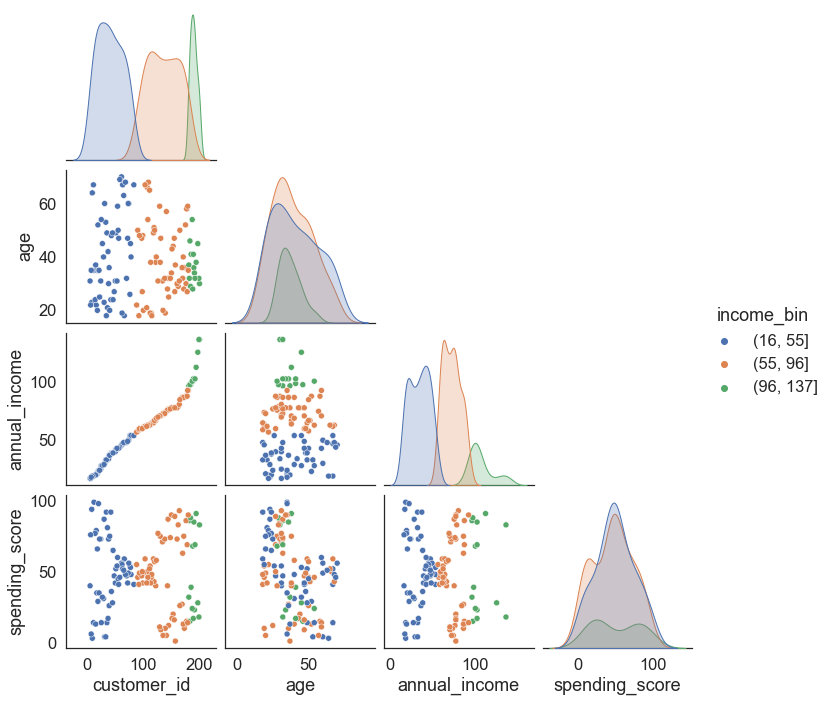

In [18]:
sns.pairplot(train, corner=True, hue='income_bin')

In [19]:
X_train_mall = train[['annual_income', 'age']]

In [20]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_mall)

train['cluster'] = kmeans.predict(X_train_mall)

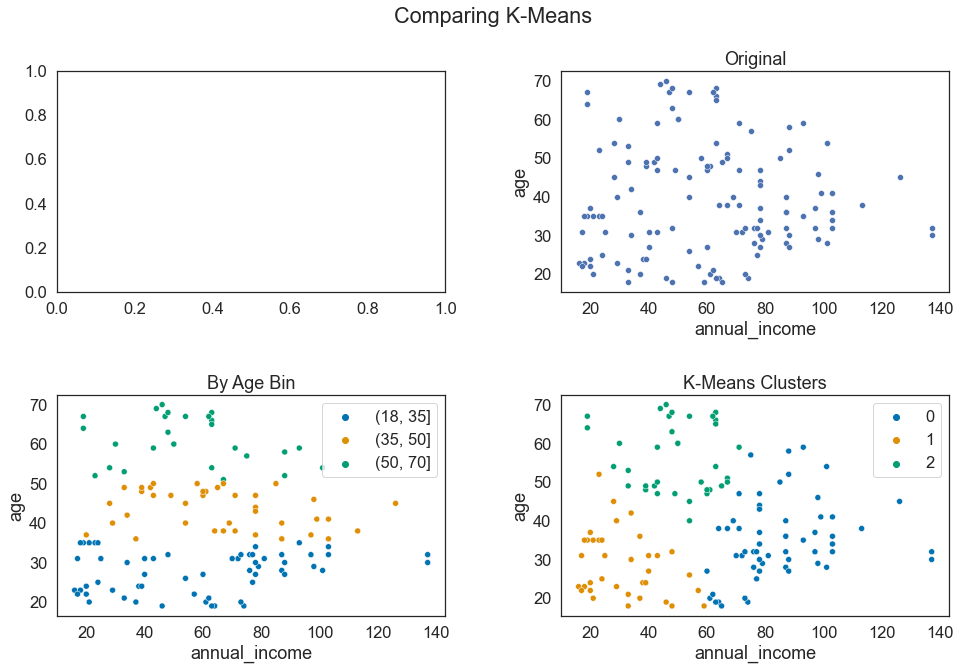

In [21]:
sns.set(font_scale=1.5)
sns.set_style('white')

fig, ax = plt.subplots(2,2, figsize=(15,10))
fig.tight_layout(pad=4.0)

fig.suptitle("Comparing K-Means")

sns.scatterplot(data=train, x='annual_income', y='age', ax=ax[0,1])
ax[0,1].set_title('Original')

sns.scatterplot(data=train, x='annual_income', y='age', hue='age_bin', ax=ax[1,0], palette='colorblind')
ax[1,0].set_title('By Age Bin')
ax[1,0].legend(loc='upper right')

sns.scatterplot(data=train, x='annual_income', y='age', hue='cluster', ax=ax[1,1], palette='colorblind')
ax[1,1].set_title('K-Means Clusters')
ax[1,1].legend(loc='upper right')

plt.show()

## 3. How does scaling impact the results of clustering?

- Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [22]:
customers = wm.new_mall_data()

train1, validate1, test1 = wm.split_data(customers)

train_scaled, validate_scaled, test_scaled = wm.scale_data(train1, validate1, test1)

In [23]:
X_train_scaled_mall = train_scaled[['annual_income', 'age']]

In [28]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_scaled_mall)

train_scaled['cluster'] = kmeans.predict(X_train_mall)

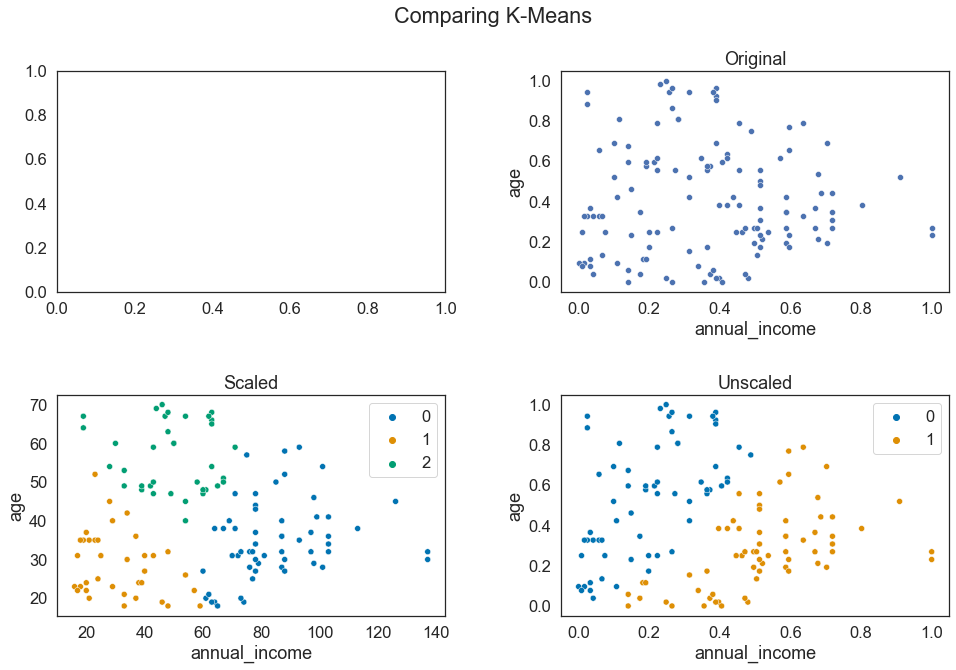

In [29]:
sns.set(font_scale=1.5)
sns.set_style('white')

fig, ax = plt.subplots(2,2, figsize=(15,10))
fig.tight_layout(pad=4.0)

fig.suptitle("Comparing K-Means")

sns.scatterplot(data=train_scaled, x='annual_income', y='age', ax=ax[0,1])
ax[0,1].set_title('Original')

sns.scatterplot(data=train, x='annual_income', y='age', hue='cluster', ax=ax[1,0], palette='colorblind')
ax[1,0].set_title('Scaled')
ax[1,0].legend(loc='upper right')

sns.scatterplot(data=train_scaled, x='annual_income', y='age', hue='cluster', ax=ax[1,1], palette='colorblind')
ax[1,1].set_title('Unscaled')
ax[1,1].legend(loc='upper right')

plt.show()